In [1]:
import torch
import torchvision
import image_utils
import numpy as np
import matplotlib.pyplot as plt
import dcgan
import csgm
import skimage

In [2]:
mnist = torchvision.datasets.MNIST('./', train=False, transform=lambda x: np.array(x)/255.,
                                   target_transform=None, download=True)

In [3]:
len(mnist)

10000

In [4]:
test_img = mnist[0][0]

In [5]:
test_img.shape

(28, 28)

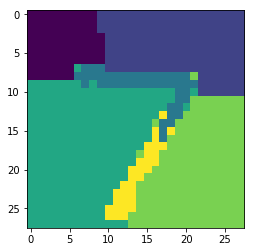

In [6]:
segments = image_utils.create_segments(test_img, kernel_size=2, max_dist=10, ratio=0.2)
plt.imshow(segments)

In [23]:
exp = {}
exp['feature']=[0,2,4]
_,mask = image_utils.create_mask(test_img,segments,exp)

[0, 2, 4]


In [24]:
target = (test_img-0.5)*2 * mask

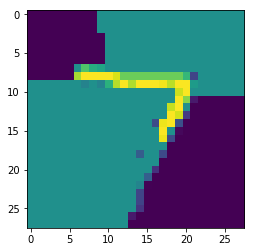

In [25]:
plt.imshow(target)

In [10]:
np.sum(mask)

587.0

## CSGM

In [11]:
G = dcgan.load_generator().cuda()

In [12]:
target.shape

(28, 28)

In [26]:
best_z = csgm.reconstruct(target, mask, np.sum(mask), G)

0 tensor(0.4977, device='cuda:0')
10 tensor(0.0976, device='cuda:0')
20 tensor(0.0712, device='cuda:0')
30 tensor(0.0512, device='cuda:0')
40 tensor(0.0456, device='cuda:0')
50 tensor(0.0446, device='cuda:0')
60 tensor(0.0440, device='cuda:0')
70 tensor(0.0436, device='cuda:0')
80 tensor(0.0431, device='cuda:0')
90 tensor(0.0427, device='cuda:0')
100 tensor(0.0425, device='cuda:0')
110 tensor(0.0422, device='cuda:0')
120 tensor(0.0420, device='cuda:0')
130 tensor(0.0417, device='cuda:0')
140 tensor(0.0415, device='cuda:0')
150 tensor(0.0413, device='cuda:0')
160 tensor(0.0411, device='cuda:0')
170 tensor(0.0409, device='cuda:0')
180 tensor(0.0407, device='cuda:0')
190 tensor(0.0405, device='cuda:0')
200 tensor(0.0403, device='cuda:0')
210 tensor(0.0401, device='cuda:0')
220 tensor(0.0399, device='cuda:0')
230 tensor(0.0397, device='cuda:0')
240 tensor(0.0395, device='cuda:0')
250 tensor(0.0393, device='cuda:0')
260 tensor(0.0390, device='cuda:0')
270 tensor(0.0387, device='cuda:0')
280

In [27]:
x = G(torch.from_numpy(best_z).cuda()).data.cpu().numpy()[0].squeeze()

In [28]:
x.shape

(28, 28)

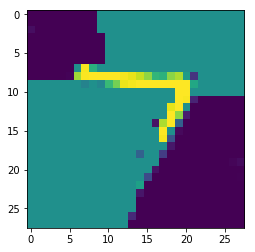

In [31]:
plt.imshow(x*mask)

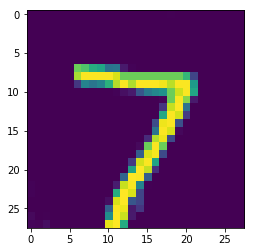

In [32]:
plt.imshow(target + (1-mask)*x)